# Melody analysis - MusicBricks Tutorial

## Introduction

This tutorial will guide you through some tools for Melody Analysis using the Essentia library (http://www.essentia.upf.edu). Melody analysis tools will extract a pitch curve from a monophonic or polyphonic audio recording [1]. It  outputs a time series (sequence of values) with the instantaneous pitch value (in Hertz) of the perceived melody. 
We provide two different operation modes: 
   1) using executable binaries; 
   2) Using Python wrappers.  
   
   
References:

[1] J. Salamon and E. Gómez, "Melody extraction from polyphonic music signals using pitch contour characteristics," IEEE Transactions on Audio, Speech, and Language Processing, vol. 20, no. 6, pp. 1759–1770, 2012.   


## 1-Using executable binaries

You can download the executable binaries for Linux (Ubuntu 14) and OSX in this link: http://tinyurl.com/melody-mbricks
To execute the binaries you need to specify the input audio file and an output YAML file, where the melody values will be stored.

#### Extracting melody from monophonic audio

Locate an audio file to be processed in WAV format (input_audiofile).

Usage: ./streaming_pitchyinfft input_audiofile output_yamlfile 

#### Extracting melody from polyphonic audio

Usage: ./streaming_predominantmelody input_audiofile output_yamlfile 

## 2-Using Python wrappers

You should first install the Essentia library with Python bindings. Installation instructions are detailed here: http://essentia.upf.edu/documentation/installing.html . 


In [1]:
# import essentia in standard mode
import essentia
import essentia.standard
from essentia.standard import *

After importing Essentia library, let's import other numerical and plotting tools

In [2]:
# import matplotlib for plotting
import matplotlib.pyplot as plt
import numpy

Load an audio file

In [3]:
# create an audio loader and import audio file
loader = essentia.standard.MonoLoader(filename = 'flamenco.wav', sampleRate = 44100)
audio = loader()
print("Duration of the audio sample [sec]:")
print(len(audio)/44100.0)

Duration of the audio sample [sec]:
14.22859410430839


Extract the pitch curve from the audio example

In [4]:
# PitchMelodia takes the entire audio signal as input - no frame-wise processing is required here...
pExt = PredominantPitchMelodia(frameSize = 2048, hopSize = 128)
pitch, pitchConf = pExt(audio)
time=numpy.linspace(0.0,len(audio)/44100.0,len(pitch) )

Plot extracted pitch contour

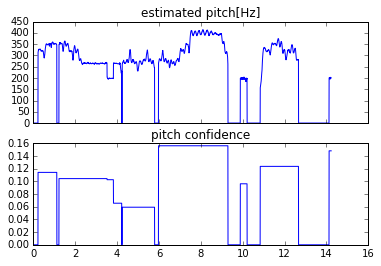

In [5]:
# plot the pitch contour and confidence over time
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(time,pitch)
axarr[0].set_title('estimated pitch[Hz]')
axarr[1].plot(time,pitchConf)
axarr[1].set_title('pitch confidence')
plt.show()

<img src="./figure_1.png" width="600">